**линейная регрессия, аналитическое решение**

Евгений Борисов  <esborisov@sevsu.ru>

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

%precision 3
np.set_printoptions(precision=2)

# генерируем набор данных

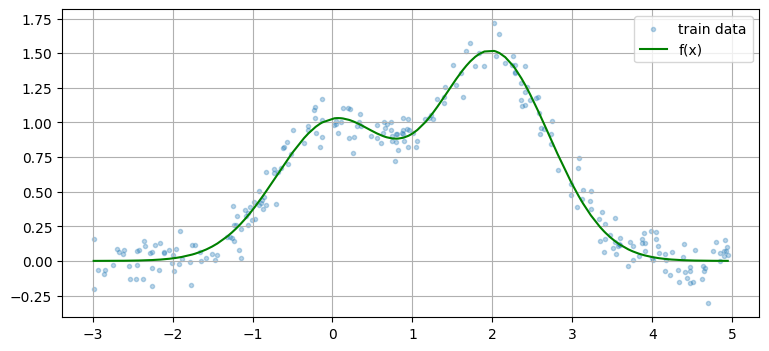

In [2]:
# f,xlim = (lambda x: np.sin(x*2.9)),(-1.,+2.)
# f,xlim = lambda x: np.sin(x*2.9)+np.cos(x*5.9),(-1,1)
f,xlim = lambda x: np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2), (-3,5)

def generate(f, xlim=(-1.,1.), n_samples=256, noise=.1 ):
    assert len(xlim)==2
    assert xlim[0]<xlim[1]
    assert n_samples>2
    assert 0.<noise<1.
    x = np.sort( rng.rand(n_samples)*(xlim[1]-xlim[0]) + xlim[0] )
    return x.reshape(-1,1), ( f(x)+rng.normal(0.,noise,n_samples) ).reshape(-1,1)

X_train,y_train = generate(f=f,xlim=xlim)

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.grid()
ax.legend()

In [3]:
# нормируем данные
# from sklearn.preprocessing   import StandardScaler
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

## модель

$$a(x,w) = \sum\limits_{i=1} x_i \cdot w_i + w_0$$

In [4]:
class LinearRegression:
    
    def __init__( self, weight=np.array([]) ):
        self._weight = weight
    
    def score(self,x):
        assert len(x)>0
        assert x.shape[1]==len(self._weight)
        return x.dot(self._weight)
    
    def predict(self,x): 
        return self.score(x)
    
    @property
    def weight(self): return self._weight

    @weight.setter
    def weight(self,value): self._weight = value
            
#     def score_partial(self,x): # частные производные модели по её параметрам
#         return x

## преобразование данных

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# собираем полином, добавляем столбец из единиц (свободный член)
poly = PolynomialFeatures( 
        degree=17, 
        interaction_only=False, 
        include_bias=True,
    ).fit(X_train)

# poly.transform(X_train)

## обучаем модель

$$ w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [6]:
# вычисляем параметры регрессии
class TrainRegression: 
    def __init__(self,model):
        self._model = model
        
    def fit(self,X,target): 
        self._model.weight = np.linalg.inv( X.T.dot(X) ).dot(X.T).dot(target) 
        return self._model


In [7]:
model = TrainRegression(LinearRegression()).fit(poly.transform(X_train),y_train)

In [8]:
display( model.weight.T )

array([[ 1.02e+00,  3.13e-02, -6.95e-01,  3.38e-01,  3.95e-01, -6.98e-02,
        -7.97e-02, -1.73e-02,  4.73e-03,  9.73e-03, -2.17e-04, -1.74e-03,
         1.55e-04,  1.38e-04, -2.42e-05, -3.28e-06,  1.08e-06, -7.08e-08]])

## тестируем

In [9]:
X_test,y_test = generate(f=f,xlim=xlim)

predicted = model.predict(poly.transform(X_test))

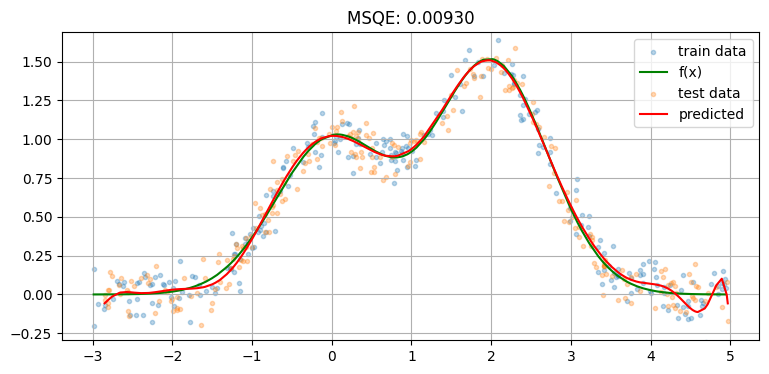

In [10]:
from sklearn.metrics import mean_squared_error

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_test,predicted,c='r',label='predicted')
ax.set_title(f'MSQE: {mean_squared_error(y_true=y_test,y_pred=predicted):.5f}')
# ax.set_xlim(X_test.min()-.1,X_test.max()+.1)
ax.set_ylim(y_test.min()-.1,y_test.max()+.1)
ax.grid()
ax.legend()